In [2]:
from joblib import dump, load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [3]:
# read and analyze the data

x = pd.read_csv("weather.csv")
y = pd.read_csv("weather_label.csv")

print(x.shape, y.shape)
print(y.value_counts())
print(x,"\n",y)

(8766, 8) (8766, 1)
flood
0        8619
1         147
Name: count, dtype: int64
      year  month  day  cloud  humidity  pressure  rainfall  temperature
0     2000      1    1      6        69    1017.1      0.00         19.2
1     2000      1    2      2        64    1017.2      0.00         20.4
2     2000      1    3     10        67    1016.8      0.00         19.2
3     2000      1    4     60        74    1016.1      0.00         18.9
4     2000      1    5     40        75    1013.9      0.00         20.6
...    ...    ...  ...    ...       ...       ...       ...          ...
8761  2023     12   27     88        62    1024.0      0.05         18.7
8762  2023     12   28     74        73    1022.3      0.05         20.1
8763  2023     12   29     72        79    1021.1      0.00         19.4
8764  2023     12   30     79        70    1018.3      0.05         20.7
8765  2023     12   31     59        73    1018.0      0.00         21.8

[8766 rows x 8 columns] 
       flood
0    

In [ ]:
scale = StandardScaler().set_output(transform="pandas")
x_after_scaling = scale.fit_transform(X=x)
print(x_after_scaling)

          year     month       day     cloud  humidity  pressure  rainfall  \
0    -1.661165 -1.601451 -1.673805 -2.639367 -0.881876  0.674691 -0.306794   
1    -1.661165 -1.601451 -1.560170 -2.808881 -1.371510  0.690259 -0.306794   
2    -1.661165 -1.601451 -1.446535 -2.469854 -1.077730  0.627989 -0.306794   
3    -1.661165 -1.601451 -1.332899 -0.350934 -0.392243  0.519016 -0.306794   
4    -1.661165 -1.601451 -1.219264 -1.198502 -0.294316  0.176531 -0.306794   
...        ...       ...       ...       ...       ...       ...       ...   
8761  1.661461  1.588154  1.280710  0.835661 -1.567363  1.748849 -0.304471   
8762  1.661461  1.588154  1.394345  0.242363 -0.490170  1.484202 -0.304471   
8763  1.661461  1.588154  1.507980  0.157606  0.097390  1.297392 -0.306794   
8764  1.661461  1.588154  1.621615  0.454255 -0.783950  0.861501 -0.304471   
8765  1.661461  1.588154  1.735250 -0.393313 -0.490170  0.814799 -0.306794   

      temperature  
0       -0.888004  
1       -0.652451  
2  

In [ ]:
# split into train and test data set
x_train, x_test, y_train, y_test = train_test_split(
    x_after_scaling, y, test_size=0.30, random_state=42
)

# define StratifiedKFold
strKFold = StratifiedKFold(n_splits=5)

# define metric use for evaluating 
scores = ["accuracy","precision", "recall", "f1"]

# Define the parameter grid for finetuning the model
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

nb_classifier = GaussianNB()

grid_search_nb = GridSearchCV(
    estimator = nb_classifier, 
    param_grid = param_grid_nb, 
    cv = strKFold,
    scoring = scores,
    refit = "f1",
    n_jobs=-1) 

grid_search_nb.fit(x_train, y_train.values.reshape(-1,))

print(grid_search_nb.best_params_)
print(grid_search_nb.best_score_)

{'var_smoothing': 1.0}
0.8838990113221291


Accuracy: 0.9946768060836502
Precision: 0.7777777777777778
Recall: 1.0
F1: 0.875


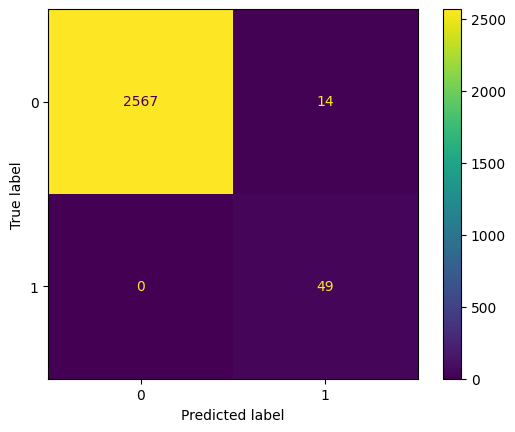

In [ ]:
# Evaluate the model on the test dataset

pred = grid_search_nb.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"Precision: {precision_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred)}")
print(f"F1: {f1_score(y_test, pred)}")


In [ ]:
# Save the model
dump(grid_search_nb.best_estimator_,"weather_classifier.joblib")
dump(scale,"weather_standard_scaler.joblib")

# Load the model and scalar
clf = load("weather_classifier.joblib") 
sca = load("weather_standard_scaler.joblib")

input = sca.transform(x.iloc[[8650]])
pre = clf.predict(input)

if (pre == 0):
    print("There is no flood in this day")
else:
    print("there will be flood in this day")

there will be flood in this day
